<a href="https://colab.research.google.com/github/rtrvale/test/blob/master/insurance_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# a few imports

import pandas as pd
from math import log10
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
dat = pd.read_csv("https://data.ct.gov/resource/t64r-mt64.csv?$limit=50000")
# Note: when I downloaded the data in csv format, the column headers were in a 
# different case. So if you run this code offline, you will need to edit the
# column names

# check that we have all the data
dat.shape

(18112, 12)

In [0]:
# display some of the data
dat.head()

,company,file_no,opened,closed,coverage,subcoverage,reason,subreason,disposition,conclusion,recovery,status
0,Transamerica Life Insurance Company,803396,2018-07-24T00:00:00.000,2018-08-06T00:00:00.000,Credit A & H,No SubCov - AH,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.00,Closed
1,21st Century Insurance Company,505848,2015-12-31T00:00:00.000,2016-01-25T00:00:00.000,Auto,NaN,Marketing/Sales,Producer Handling,Company Position Upheld,Unjustified,0.00,Closed
2,21st Century Insurance Company,601543,2016-04-01T00:00:00.000,2016-08-12T00:00:00.000,Auto,NaN,Underwriting,Cancellation,Insufficient Information,No Action Necessary,0.00,Closed
3,"Anthem Health Plans, Inc",805400,2018-11-15T00:00:00.000,2018-12-05T00:00:00.000,NaN,NaN,Utilization Review,Time Delay,Insufficient Information,No Action Necessary,0.00,Closed
4,Allstate Fire and Casualty Insurance Company,803285,2018-07-18T00:00:00.000,2018-08-06T00:00:00.000,Auto,NaN,Premium and Rating,Premium Refund Delay,Corrective Action,Justified,95.59,Closed


In [0]:
# dat is a pandas data frame with 18045(+*) rows and 12 columns
# Column names
dat.columns

Index(['company', 'file_no', 'opened', 'closed', 'coverage', 'subcoverage',
       'reason', 'subreason', 'disposition', 'conclusion', 'recovery',
       'status'],
      dtype='object')

In [0]:
# Check for missing values
dat.apply(lambda x: x.isna().sum(), axis=0)
# this applies the function which counts the number of na values in each of the
# individual columns - I actually did this later


company            0
file_no            0
opened             0
closed           424
coverage        3197
subcoverage    11795
reason             0
subreason          0
disposition      378
conclusion       378
recovery           0
status             0
dtype: int64

In [0]:
# we may also be interested in duplicated rows at this point
# This counts how many rows are duplicated
dat.duplicated().sum()

0

In [0]:
# Univariate analysis - look at the columns one by one; clean

# company is a categorical variable
dat['company'].value_counts()

Anthem Health Plans, Inc                                       1998
ConnectiCare Insurance Company, Inc                             653
Allstate Fire and Casualty Insurance Company                    576
UnitedHealthcare Insurance Company                              406
GEICO General Insurance Company                                 405
ConnectiCare Benefits, Inc.                                     402
Aetna Life Insurance Company                                    395
ConnectiCare Inc                                                382
GEICO Indemnity Company                                         378
Progressive Direct Insurance Company                            306
Allstate Insurance Company                                      302
Progressive Casualty Insurance Company                          298
Oxford Health Plans (CT), Inc                                   289
State Farm Fire & Casualty Company                              257
LM General Insurance Company                    

In [0]:
len(dat['company'].value_counts()) # number of comapnies

672

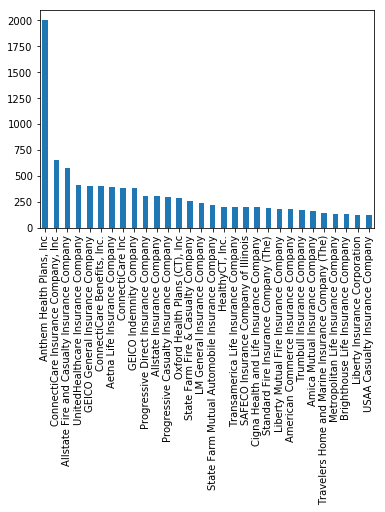

In [0]:
# 672 companies represented
companies = dat['company'].value_counts()
companies[:30,].plot(kind='bar') # just looking at the top 30
# Look at the x-axis; obviously there is some repetition here
# We might need to know more about insurance companies to clean this


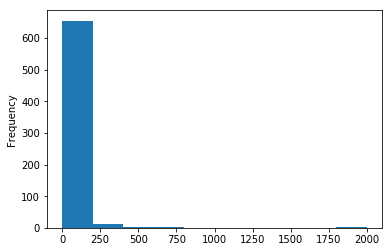

In [0]:
# look at number of complaints by company
# A lot of companies have only one complaint
companies.plot.hist()

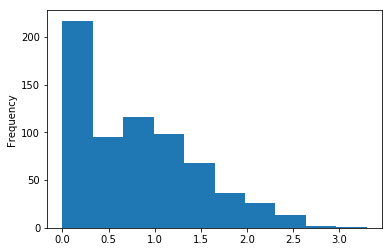

In [0]:
# with highly skewed data, you should often apply the logarithm
companies.apply(log10).plot.hist()

# We see that there are a lot of companies with one complaint, and then a peak
# around 10 complaints (log10(10) = 1.0). So it looks like we have a mixture of
# two different types of company

In [0]:
# File Number
dat['file_no'].nunique()
# This is interesting; I thought it would be a unqiue identifier

13769

In [0]:
# This is interesting; I thought it would be a unqiue identifier
dat.loc[dat['file_no']==801554,:]

# One person opening a lot of complaints on the same day?
# Maybe we should be looking at file numbers rather than rows of the data set?

,company,file_no,opened,closed,coverage,subcoverage,reason,subreason,disposition,conclusion,recovery,status
16337,Empire Fire and Marine Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,Auto Liability,NaN,Unfair Claims Practice,Storage Fees,Company Position Upheld,Unjustified,0.0,Closed
16341,Zurich American Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,NaN,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.0,Closed
16359,Empire Fire and Marine Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.0,Closed
16361,Zurich American Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.0,Closed
16365,Empire Fire and Marine Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,NaN,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.0,Closed
16368,Empire Fire and Marine Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,NaN,NaN,Unfair Claims Practice,Storage Fees,Company Position Upheld,Unjustified,0.0,Closed
16386,Zurich American Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,Auto Liability,NaN,Unfair Claims Practice,Storage Fees,Company Position Upheld,Unjustified,0.0,Closed
16407,Zurich American Insurance Company,801554,2018-03-29T00:00:00.000,2018-04-18T00:00:00.000,NaN,NaN,Unfair Claims Practice,Storage Fees,Company Position Upheld,Unjustified,0.0,Closed


In [0]:
dat['file_no'].value_counts().value_counts()
# the first value_counts() counts the number of rows with that file number, 
# for each file number.

# the second value_counts() counts the number of file numbers with that number
# of rows.

# Overall, these two functions count how many file numbers are repeated a given
# number of times

# quite a lot have a duplicated file number

1    9879
2    3654
4     167
3      55
6      10
8       4
Name: file_no, dtype: int64

In [0]:
# Now we move on to look at the opened and closed dates
# Pandas has a lot of useful functions for dealing with dates

dat['opened'] = pd.to_datetime(dat['opened'])
dat['closed'] = pd.to_datetime(dat['closed'])

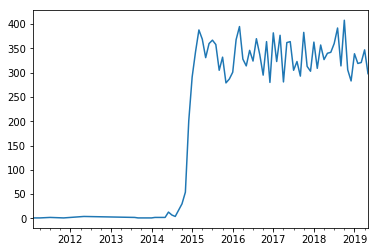

In [0]:
month_year_opened = dat['opened'].dt.to_period('M')
# the dt.to_period('M') method is converting each date stamp to
# just a month and year, so we can look at how many complaints are
# in each month over time

month_year_opened.value_counts().sort_index().plot()
# sort_index() sorts the value counts in order of date

In [0]:
month_year_closed = dat['closed'].dt.to_period('M')
month_year_closed.value_counts().sort_index().head()

# we immediately see that it looks like they only started gathering the
# data in 2015!

2011-04      1
2014-06      1
2014-07      2
2015-01    311
2015-02    313
Freq: M, Name: closed, dtype: int64

In [0]:
# we can look at the difference between opened and closed
xtab = pd.crosstab(month_year_opened, month_year_closed)
xtab

closed,2011-04,2014-06,2014-07,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
opened,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-07,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2013-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2013-09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


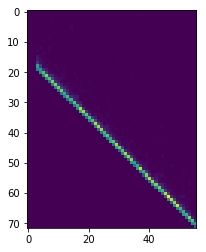

In [0]:
# The cross table is too big to visualize, so we can do a heatmap of it instead
# Notice that there is a very strong tendency for complaints to be resolved in 
# exactly one month

plt.imshow(xtab)

In [0]:
(dat['opened'].isna().sum(), 
dat['closed'].isna().sum()) # 422 not closed

(0, 424)

In [0]:
max(dat['opened']) # most recently opened one
# we are dealing with live data, so it makes sense that there
# are unclosed cases

Timestamp('2019-05-22 00:00:00')

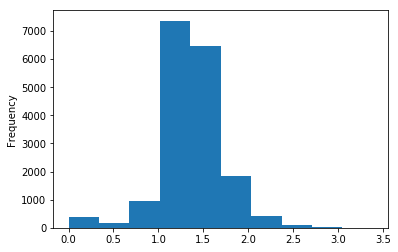

In [0]:
duration = dat['closed'] - dat['opened'] # a series of "days"
duration.dt.days.apply(lambda x: log10(x+1)).plot.hist()


In [0]:
duration.dt.days.mean()

32.409995477159654

In [0]:
(min(duration), max(duration))

(Timedelta('0 days 00:00:00'), Timedelta('2449 days 00:00:00'))

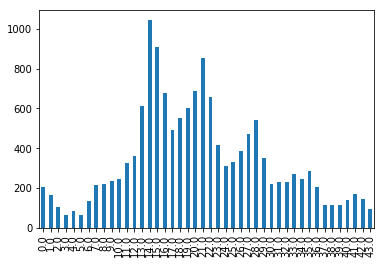

In [0]:
duration.dt.days.value_counts().sort_index().plot("bar")
duration.dt.days.value_counts().sort_index()[:43].plot("bar")
# notice how there's a peak at multiples of 7 days

In [0]:
# Days of the week can also be interesting!
dat['opened'].dt.weekday_name.value_counts()

Wednesday    3981
Tuesday      3722
Monday       3578
Thursday     3510
Friday       3321
Name: opened, dtype: int64

In [0]:
dat['closed'].dt.weekday_name.value_counts()

Tuesday      4143
Wednesday    4033
Thursday     3371
Monday       3280
Friday       2861
Name: closed, dtype: int64

In [0]:
# Coverage
dat['coverage'].nunique()
dat['coverage'].isna().sum()
dat['coverage'].value_counts()
# might want to break it down into broader categories
# often a categorical variable like this one is really messy, but here
# it looks like it has been recorded in a systematic way

Auto Liability               2810
Homeowners                   1996
Group Health                 1831
Auto                         1078
Auto Physical Damage         1037
Exchange-Individual Hlth      959
Individual Health             932
Individual Life               722
Individual Long Term Care     462
Dental                        235
General Liability             224
Individual Annuity            209
Commercial Multi-Peril        191
A & H                         188
Worker's Compensation         176
Group Disability Income       143
Group Life                    139
Condo Unit Owner              126
Commercial Auto               125
Other [Enter Coverage]        119
Ind Medicare Supplemental     114
Auto Medical Payment          109
Travel Insurance              103
Condo Association              76
Tenant Homeowners              66
Commercial Fire                59
Ind Disability Income          56
Dwelling Fire                  53
Short Term Medical             52
Unknown       

In [0]:
dat['subcoverage'].isna().sum()
dat['subcoverage'].isna().value_counts()
# mostly missing, so unlikely that we could use this in modelling


True     11795
False     6317
Name: subcoverage, dtype: int64

In [0]:
# Reason
dat['reason'].value_counts()
#dat['reason'].isna().value_counts()

In [0]:
# SubReason
dat['subreason'].value_counts()

In [0]:
dat['disposition'].value_counts()

Company Position Upheld       4708
Claim Settled                 2081
Furnished Information         2050
Contract Provision            1882
Corrective Action             1725
Refer-Judicial/Attorney        672
Premium Refund                 328
Additional Money Received      326
External Review Info Sent      322
Cancellation Upheld            312
Pol Restored/Reinstated        304
Claim Paid With Interest       300
Rate Increase Explained        299
Complaint Withdrawn            294
Enter Arbitration              293
Coverage Granted               213
Insufficient Information       173
Non-Renewal Upheld             171
Refer To Appraisal             163
Satisfied                      148
Provider Issue                 122
Record Only                    117
Non-Renewal Rescinded          106
Satisfactory Explanation        74
Policy Not In Force             72
No Cause For Action             70
Cancellation Withdrawn          69
Coverage Extended               61
Policy Issued       

In [0]:
dat['conclusion'].value_counts()
dat['conclusion'].isna().value_counts()

False    17734
True       378
Name: conclusion, dtype: int64

In [0]:
dat['conclusion'].value_counts()/dat.shape[0]
# Only 13% of claims are found to be justified

Unjustified              0.472339
Furnished Information    0.272637
Justified                0.134662
No Action Necessary      0.034784
Voluntary Reconsider     0.034397
Questionable             0.028103
No Authority             0.002153
Cross Reference Only     0.000055
Name: conclusion, dtype: float64

In [0]:
# Recovery amount - lots of zeroes
dat['recovery']

0            0.00
1            0.00
2            0.00
3            0.00
4           95.59
5          870.91
6            0.00
7          924.00
8            0.00
9            0.00
10           0.00
11           0.00
12           0.00
13           0.00
14           0.00
15           0.00
16           0.00
17           0.00
18           0.00
19           0.00
20           0.00
21           0.00
22           0.00
23           0.00
24           0.00
25           0.00
26           0.00
27           0.00
28           0.00
29           0.00
           ...   
18082     4376.00
18083     1200.00
18084        0.00
18085        0.00
18086    11836.49
18087        0.00
18088    11836.49
18089     4989.00
18090     4989.00
18091        0.00
18092        0.00
18093        0.00
18094     1574.15
18095        0.00
18096        0.00
18097        0.00
18098        0.00
18099        0.00
18100        0.00
18101        0.00
18102        0.00
18103      159.36
18104        0.00
18105      804.50
18106     

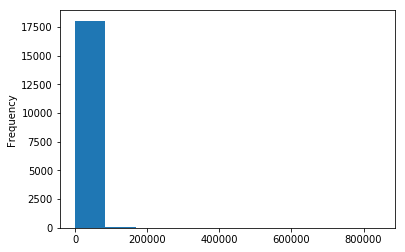

In [0]:
dat['recovery'].plot.hist()

False    15041
True      3071
Name: recovery, dtype: int64

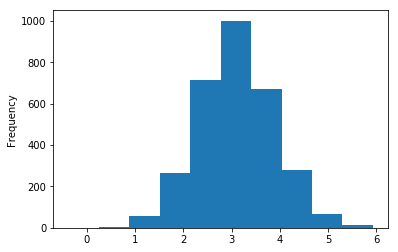

In [0]:
# plot the logs of the recovery values
# there are only 3070 positive values but they have a nice distribution

# This shape (zero-inflated lognormal) is very common in financial data

dat['recovery'].loc[dat['recovery'] > 0].apply(log10).plot.hist()
(dat['recovery'] > 0).value_counts()

In [0]:
# Status
dat['status'].value_counts()

Closed          17646
Open              364
Re-Opened          56
Do Not Purge       42
Pre-Closed          4
Name: status, dtype: int64

In [0]:
# check that closed and status are consistent

pd.crosstab(dat['status'], dat['closed'].notna())

closed,False,True
status,,
Closed,0,17646
Do Not Purge,0,42
Open,364,0
Pre-Closed,4,0
Re-Opened,56,0


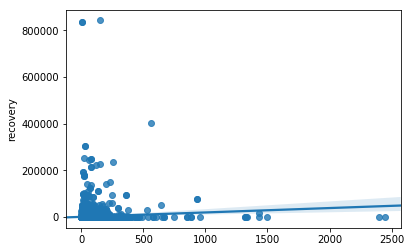

In [0]:
# Example of a continuous versus continuous variable - look at scatterplots
duration = duration.dt.days
recovery = dat['recovery']

sns.regplot(duration, recovery)

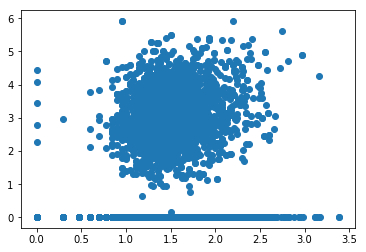

In [0]:
x=duration.apply(lambda x: log10(x+1))
y=recovery.apply(lambda x: log10(x+1))

plt.scatter(x, y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


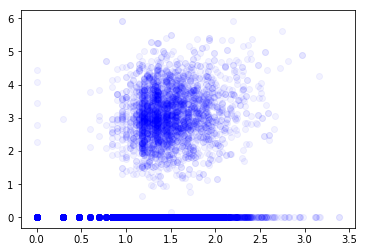

In [0]:
# tip - do not only plot scatterplots using solid colour, as you will miss
# a lot of information. Use a KDE or semitransparent plotting colours

plot = plt.scatter(x, y, c=(0, 0, 1, 0.05))
# shows something more like a KDE. Interesting plot
# vertical lines. Why? Whole number of weeks? 
# diagonal - why? The longer the duration of the complaint, the more you tend to get
# - makes sense

[Text(0, 0, 'Allstate Fire and Casualty Insurance Company'),
 Text(0, 0, 'UnitedHealthcare Insurance Company'),
 Text(0, 0, 'Progressive Direct Insurance Company'),
 Text(0, 0, 'GEICO General Insurance Company'),
 Text(0, 0, 'Anthem Health Plans, Inc'),
 Text(0, 0, 'ConnectiCare Inc'),
 Text(0, 0, 'Aetna Life Insurance Company'),
 Text(0, 0, 'ConnectiCare Insurance Company, Inc'),
 Text(0, 0, 'ConnectiCare Benefits, Inc.'),
 Text(0, 0, 'GEICO Indemnity Company')]

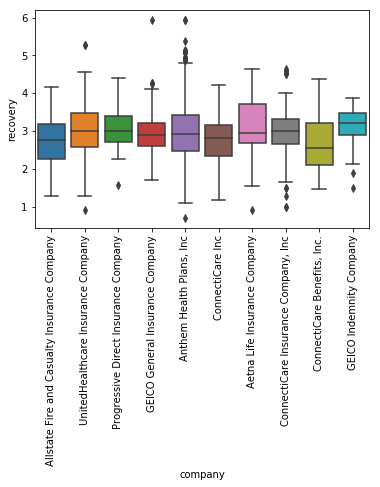

In [0]:
# Example of continuous versus categorical
top10companies = list( dat['company'].value_counts()[:10].index )

# look at the 10 most complained about companies and the recovery
# values for these companies. We can compare the recovery values
# across comapnies using a boxplot

company = dat['company']
mask = company.isin(top10companies) & (recovery > 0 )

x1 = company[mask]
y1 = recovery.apply(lambda x: log10(x) if x>0 else x)[mask]

ax = sns.boxplot(x1,y1)

# rotate the axis labels to make them readable
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


In [0]:
# In general

# cts vs cts - use scatterplots
# cts vs cat - use boxplots
# cat vs cat - use two-way tables

# for larger numbers of variables, can use dimension reduction techniques
# such as PCA or t-SNA to do visualisation